In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
WINDOW_SIZE = 10  # You can change this to 2, 5, 20, etc.
# ---------------------

def generate_true_recursive_sine(length=800):
    omega = 0.15
    coeff = 2 * np.cos(omega)

    # Start sequence around 0.5 center
    seq = [0.5, 0.55]

    for _ in range(length - 2):
        # The recursive rule: centered at 0.5
        next_val = coeff * (seq[-1] - 0.5) - (seq[-2] - 0.5) + 0.5
        # Clamp to your 0.25 - 0.75 requirement
        next_val = np.clip(next_val, 0.2501, 0.7499)
        seq.append(next_val)

    return np.array(seq, dtype=np.float32)

full_data = generate_true_recursive_sine(800)

def create_dataset(data, k):
    X, y = [], []
    for i in range(len(data) - k):
        X.append(data[i : i + k])
        y.append(data[i + k])
    return torch.tensor(np.array(X)), torch.tensor(np.array(y)).view(-1, 1)

X_train, y_train = create_dataset(full_data[:600], WINDOW_SIZE)
print(f"Window Size: {WINDOW_SIZE}")
print(f"X_train shape: {X_train.shape}")

Window Size: 10
X_train shape: torch.Size([590, 10])


In [54]:
class VariableRecursiveNet(nn.Module):
    def __init__(self, k):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(k, 64),
            nn.Tanh(),
            nn.Linear(64, 32),
            nn.Tanh(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

model = VariableRecursiveNet(WINDOW_SIZE)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [55]:
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.10f}")

Epoch 0, Loss: 0.1375692785
Epoch 200, Loss: 0.0000487519
Epoch 400, Loss: 0.0000420222
Epoch 600, Loss: 0.0000350939
Epoch 800, Loss: 0.0000288557


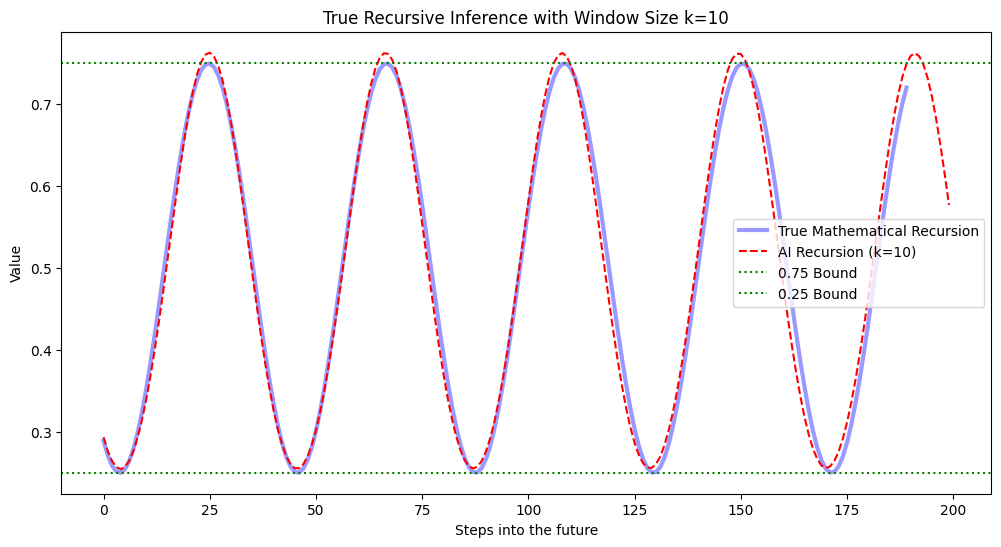

In [56]:
# Extract the very first window from the test set (after index 600)
current_window = full_data[600 : 600 + WINDOW_SIZE].tolist()
predictions = []

model.eval()
with torch.no_grad():
    for _ in range(200):
        input_tensor = torch.tensor([current_window], dtype=torch.float32)
        next_val = model(input_tensor).item()
        predictions.append(next_val)

        # --- THE VARIABLE SLIDING WINDOW LOGIC ---
        current_window.pop(0)       # Remove x_{n-k}
        current_window.append(next_val) # Append the AI's prediction
        # -----------------------------------------

ground_truth = full_data[600 + WINDOW_SIZE : 600 + WINDOW_SIZE + 200]

plt.figure(figsize=(12, 6))
plt.plot(ground_truth, label='True Mathematical Recursion', color='blue', alpha=0.4, lw=3)
plt.plot(predictions, label=f'AI Recursion (k={WINDOW_SIZE})', color='red', ls='--')
plt.axhline(0.75, color='green', ls=':', label='0.75 Bound')
plt.axhline(0.25, color='green', ls=':', label='0.25 Bound')
plt.title(f"True Recursive Inference with Window Size k={WINDOW_SIZE}")
plt.xlabel("Steps into the future")
plt.ylabel("Value")
plt.legend()
plt.show()

In [57]:
WINDOW_SIZE = 5

X_train, y_train = create_dataset(full_data[:600], WINDOW_SIZE)
print(f"Window Size: {WINDOW_SIZE}")
print(f"X_train shape: {X_train.shape}")

Window Size: 5
X_train shape: torch.Size([595, 5])


In [58]:
model = VariableRecursiveNet(WINDOW_SIZE)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.10f}")

Epoch 0, Loss: 0.3724247515
Epoch 200, Loss: 0.0013384880
Epoch 400, Loss: 0.0000623113
Epoch 600, Loss: 0.0000516816
Epoch 800, Loss: 0.0000460492


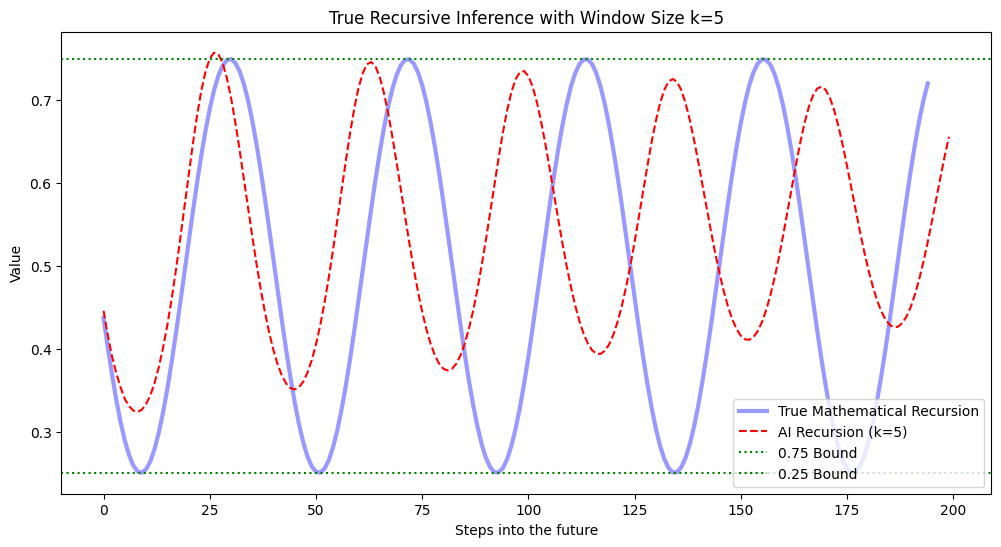

In [59]:
# Extract the very first window from the test set (after index 600)
current_window = full_data[600 : 600 + WINDOW_SIZE].tolist()
predictions = []

model.eval()
with torch.no_grad():
    for _ in range(200):
        input_tensor = torch.tensor([current_window], dtype=torch.float32)
        next_val = model(input_tensor).item()
        predictions.append(next_val)

        # --- THE VARIABLE SLIDING WINDOW LOGIC ---
        current_window.pop(0)       # Remove x_{n-k}
        current_window.append(next_val) # Append the AI's prediction
        # -----------------------------------------

ground_truth = full_data[600 + WINDOW_SIZE : 600 + WINDOW_SIZE + 200]

plt.figure(figsize=(12, 6))
plt.plot(ground_truth, label='True Mathematical Recursion', color='blue', alpha=0.4, lw=3)
plt.plot(predictions, label=f'AI Recursion (k={WINDOW_SIZE})', color='red', ls='--')
plt.axhline(0.75, color='green', ls=':', label='0.75 Bound')
plt.axhline(0.25, color='green', ls=':', label='0.25 Bound')
plt.title(f"True Recursive Inference with Window Size k={WINDOW_SIZE}")
plt.xlabel("Steps into the future")
plt.ylabel("Value")
plt.legend()
plt.show()